In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
data_path = "C:/Users/carllel colquhoun/Desktop/PYTHON FILES/LabWeek5/CardiologyCategorical_Train.xls"
data = pd.read_excel(data_path)
# Removing First two (2) rows, not part of data set
data = data.drop([0,1],axis=0)
# extracting selected features
data2 = data[['age','sex','Fasting blood sugar <120','angina','class']]
data2.head()

,age,sex,Fasting blood sugar <120,angina,class
2,60,Male,False,True,Sick
3,49,Male,False,False,Healthy
4,64,Male,False,True,Healthy
5,63,Male,False,False,Sick
6,53,Male,True,True,Sick


In [6]:
# decision tree from sklearn only accepts float/integer values for variables
# We must therefore transform the data before applying the algorithm
def create_label_encoder_dict(df):
    from sklearn.preprocessing import LabelEncoder
    
    label_encoder_dict = {}
    for column in df.columns:
        # Only create encoder for categorical data types
        if not np.issubdtype(df[column].dtype, np.number) and column != 'age':
            label_encoder_dict[column]= LabelEncoder().fit(df[column])
    return label_encoder_dict

label_encoders = create_label_encoder_dict(data2)
print("Encoded Values for each Label")
print("="*32)
for column in label_encoders:
    print("="*32)
    print('Encoder(%s) = %s' % (column, label_encoders[column].classes_ ))
    print(pd.DataFrame([range(0,len(label_encoders[column].classes_))], columns=label_encoders[column].classes_, index=['Encoded Values']  ).T)


Encoded Values for each Label
Encoder(sex) = ['Female' 'Male']
        Encoded Values
Female               0
Male                 1
Encoder(Fasting blood sugar <120) = [False True]
       Encoded Values
False               0
True                1
Encoder(angina) = [False True]
       Encoded Values
False               0
True                1
Encoder(class) = ['Healthy' 'Sick']
         Encoded Values
Healthy               0
Sick                  1


In [7]:
# Apply each encoder to the data set to obtain transformed values
data3 = data2.copy() # create copy of initial data set
for column in data3.columns:
    if column in label_encoders:
        data3[column] = label_encoders[column].transform(data3[column])

print("Transformed data set")
print("="*32)
print(data3)

Transformed data set
    age  sex  Fasting blood sugar <120  angina  class
2    60    1                         0       1      1
3    49    1                         0       0      0
4    64    1                         0       1      0
5    63    1                         0       0      1
6    53    1                         1       1      1
7    58    0                         1       0      0
8    58    1                         0       0      1
9    58    1                         0       0      1
10   63    1                         1       0      0
11   67    1                         0       1      1
12   67    1                         0       1      1
13   37    1                         0       0      0
14   41    0                         0       0      0
15   56    1                         0       0      0
16   62    0                         0       0      1
17   57    0                         0       1      0
18   57    1                         0       0      0
19   56

In [8]:
# decision tree from sklearn only accepts float/integer values for variables
# We must therefore transform the data before applying the algorithm
def create_label_encoder_dict(df):
    from sklearn.preprocessing import LabelEncoder
     
    label_encoder_dict = {}
    for column in df.columns:
        # Only create encoder for categorical data types
        if not np.issubdtype(df[column].dtype, np.number) and column != 'age':
            label_encoder_dict[column]= LabelEncoder().fit(df[column])
    return label_encoder_dict

label_encoders = create_label_encoder_dict(data)
print("Encoded Values for each Label")
print("="*32)
for column in label_encoders:
    print("="*32)
    print('Encoder(%s) = %s' % (column, label_encoders[column].classes_ ))
    print(pd.DataFrame([range(0,len(label_encoders[column].classes_))], columns=label_encoders[column].classes_, index=['Encoded Values']  ).T)


Encoded Values for each Label
Encoder(sex) = ['Female' 'Male']
        Encoded Values
Female               0
Male                 1
Encoder(chest pain type) = [' Asymptomatic' 'Abnormal Angina' 'Angina' 'NoTang']
                 Encoded Values
 Asymptomatic                 0
Abnormal Angina               1
Angina                        2
NoTang                        3
Encoder(blood pressure) = [100 102 104 105 108 110 112 115 117 118 120 122 124 125 126 128 130 132
 134 135 138 140 142 145 150 152 155 160 165 170 174 180]
     Encoded Values
100               0
102               1
104               2
105               3
108               4
110               5
112               6
115               7
117               8
118               9
120              10
122              11
124              12
125              13
126              14
128              15
130              16
132              17
134              18
135              19
138              20
140              21
142       

In [9]:
# Apply each encoder to the data set to obtain transformed values
data3 = data.copy() # create copy of initial data set
for column in data3.columns:
    if column in label_encoders:
        data3[column] = label_encoders[column].transform(data3[column])

print("Transformed data set")
print("="*32)
print(data3)

Transformed data set
    age  sex  chest pain type  blood pressure  cholesterol  \
2    60    1                0              16           20   
3    49    1                1              16           63   
4    64    1                2               5           22   
5    63    1                0              16           53   
6    53    1                0              21           17   
7    58    0                2              24           73   
8    58    1                1              10           74   
9    58    1                3              17           31   
10   63    1                2              23           38   
11   67    1                0              27           75   
12   67    1                0              10           34   
13   37    1                3              16           50   
14   41    0                1              16           18   
15   56    1                1              10           41   
16   62    0                0              21    

In [15]:
# separate our data into dependent (Y) and independent(X) variables
X_data = data3[['age','sex','Fasting blood sugar <120','angina']]
Y_data = data3['class']

In [16]:
# import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

clf = DecisionTreeClassifier(max_depth=2, criterion='entropy') 
# Change the max_depth to 10 or
# build classifier
clf.fit(X_data, Y_data)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [17]:
print(pd.DataFrame([ "%.2f%%" % perc for perc in (clf.feature_importances_ * 100) ], index = X_data.columns, columns = ['Feature Significance in Decision Tree']))

                         Feature Significance in Decision Tree
age                                                     45.46%
sex                                                      0.00%
Fasting blood sugar <120                                 0.00%
angina                                                  54.54%


Decision Tree Rules
def decision_tree(age, sex, Fasting blood sugar <120, angina):
  if angina <= 0.5:
    if age <= 56.5:
      return [[ 44.   9.]] # Distribution of samples in node
    else:  # if age > 56.5
      return [[ 20.  22.]] # Distribution of samples in node
  else:  # if angina > 0.5
    if age <= 54.5:
      return [[  9.  11.]] # Distribution of samples in node
    else:  # if age > 54.5
      return [[  5.  27.]] # Distribution of samples in node
Encoded Values for each Label
Encoder(sex) = ['Female' 'Male']
        Encoded Values
Female               0
Male                 1
Encoder(chest pain type) = [' Asymptomatic' 'Abnormal Angina' 'Angina' 'NoTang']
                 Encoded Values
 Asymptomatic                 0
Abnormal Angina               1
Angina                        2
NoTang                        3
Encoder(blood pressure) = [100 102 104 105 108 110 112 115 117 118 120 122 124 125 126 128 130 132
 134 135 138 140 142 145 150 152 155 160 165 170 174 180]
  

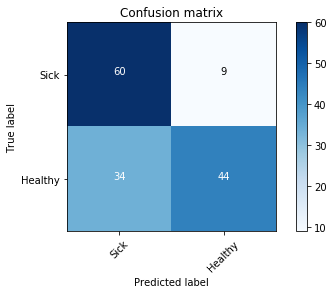

In [18]:
def tree_to_code(tree, feature_names, label_encoders={}):
    from sklearn.tree import _tree
    
    '''
    Outputs a decision tree model as a Python function
    
    Parameters:
    -----------
    tree: decision tree model
        The decision tree to represent as a function
    feature_names: list
        The feature names of the dataset used for building the decision tree
    '''
    
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    print("def decision_tree({}):".format(", ".join(feature_names)))
    
    def recurse(node, depth):
        indent = "  " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            print("{}if {} <= {}:".format(indent, name, threshold))
            recurse(tree_.children_left[node], depth + 1)
            print("{}else:  # if {} > {}".format(indent, name, threshold))
            recurse(tree_.children_right[node], depth + 1)
        else:
            #print(node)
            
            name = tree_.feature[node] 
            if name in label_encoders:
                if isinstance(label_encoders[name] , LabelEncoder) or True:
                    print("{}-return {}".format(indent, label_encoders[name].inverse_transform(tree_.value[node])))
                    return
            print("{}return {} # Distribution of samples in node".format(indent, tree_.value[node]))
            
    recurse(0, 1)
    
print("Decision Tree Rules")
print("="*32)
tree_to_code(clf, X_data.columns, label_encoders)
    
    
label_encoders = create_label_encoder_dict(data)
print("Encoded Values for each Label")
print("="*32)
for column in label_encoders:
    print("="*32)
    print('Encoder(%s) = %s' % (column, label_encoders[column].classes_ ))
    print(pd.DataFrame([range(0,len(label_encoders[column].classes_))], columns=label_encoders[column].classes_, index=['Encoded Values']  ).T)

k=(clf.predict(X_data) == Y_data) # Determine how many were predicted correctly
print(k.value_counts())

from sklearn.metrics import confusion_matrix

cm=confusion_matrix(Y_data, clf.predict(X_data), labels=Y_data.unique())
print(cm)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    import itertools
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
plot_confusion_matrix(cm,data['class'].unique())

In [19]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

import graphviz

dot_data = tree.export_graphviz(clf,out_file=None, 
                                feature_names=X_data.columns, 
                         class_names=label_encoders[Y_data.name].classes_,  
                         filled=True, rounded=True,  proportion=True,
                                node_ids=True, #impurity=False,
                         special_characters=True)

graph = graphviz.Source(dot_data) 
graph.view()

'Source.gv.pdf'